# **Home Assignment #8 (Ch.8 Model Inference and Averaging)**
## **Lika Lomidze DSBA181** 
## **Aleksandr Zybin  ICEF**

## №1 (8.1, p.293. Log-likelihood maximization in EM algorithm)

According to Jensen's inequality: 


> $E[\phi(X)]\leq\phi(E(X))\Rightarrow E_{q}[log(\frac{r(Y)}{q(Y)}]\leq log(E_{q}\frac{r(Y)}{q(Y)})$

If we explicitly derive $log[E_{q}(\frac{r(Y)}{q(Y)})]$, then we will get integral of the density function $r(Y)$:


> $log(E_{q}\frac{r(Y)}{q(Y)})=log(\intop_{-\infty}^{+\infty}(\frac{r(Y)}{q(Y)})q(Y)dy)=log(\intop_{-\infty}^{+\infty}(r(Y)dy)=log(1)=0$

Our target function is bounded from above by $log(1)=0$:



> $E_{q}[log(\frac{r(Y)}{q(Y)}]\leq log(1) \Rightarrow E_{q}[log(\frac{r(Y)}{q(Y)})]$ is maximised when $r(Y)=q(Y)$




According to eq. (8.46) $R(θ, θ)$ is the expectation of a log-likelihood of a density. Thus,


> $E_{q}[log(\frac{r(Y)}{q(Y)}]=\underset{R(θ′,θ)}{\underbrace{E_{q}[log(r(Y)]}}-\underset{R(θ,θ)}{\underbrace{E_{q}[log(q(Y)]}}=R(θ′,θ)-R(θ,θ)\leq0$

Hence, $R(θ,θ)\geq R(θ′,θ)$

## №2 (Reproduce Fig. 8.2, p.264)

In [ ]:
install.packages('splines')
library(splines)
install.packages('repr')
library(repr)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message:
“package ‘splines’ is a base package, and should not be updated”
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



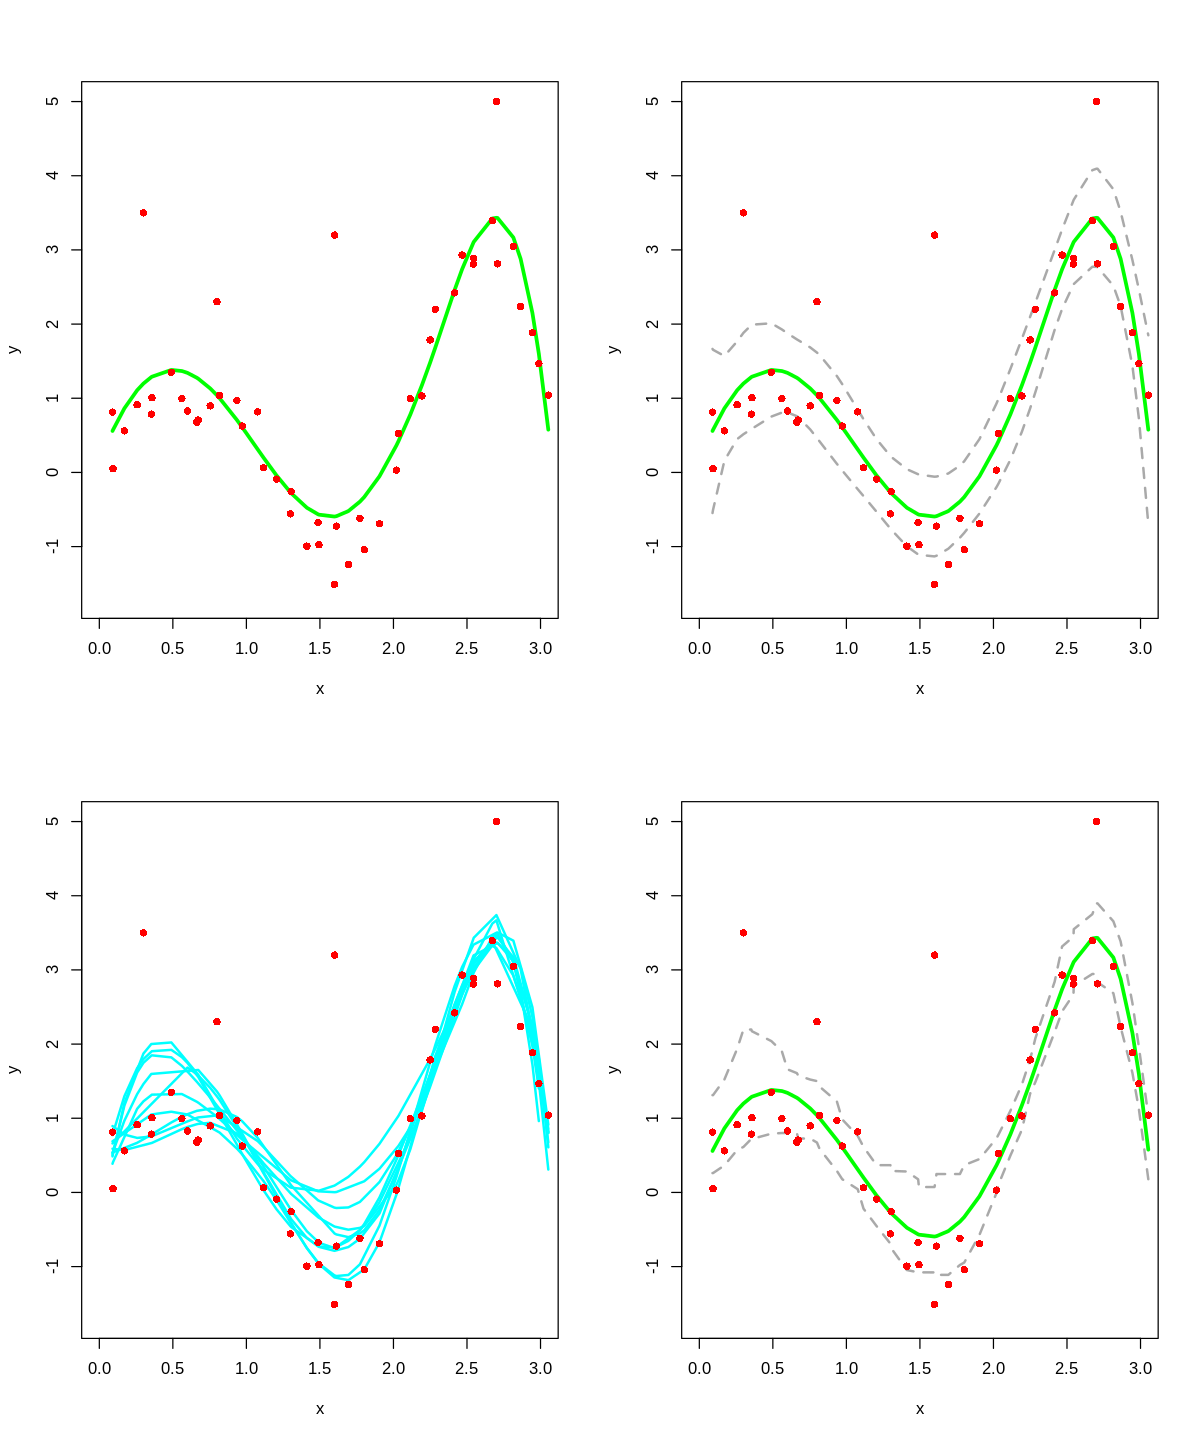

In [ ]:
x_ = c(0.3, 0.8, 1.6, 2.7)
y_ = c(3.5, 2.3, 3.2, 5.0)
n = 50 - length(x_)
set.seed(0)
x = seq(0,3, length.out=n) + runif(n,0,0.1)
y = x*sin(3*x) + runif(n)
x = c(x, x_)
y = c(y, y_)


cubic_spline <- function(x,y)
{
  spline <- bs(x,knots=quantile(x)[2:4]) 
  model <- lm(y~spline)
  pred <- predict(model,interval="confidence",level=0.95)
  return (pred)
}

bootstrap_left <- function(x,y)
{
  index <- sample(c(1:50),replace=TRUE)
  spline_bp <- bs(x[index],knots=quantile(x[index])[2:4])
  model <- lm(y[index]~spline_bp)
  pred <- predict(model)
  return (c(x[index],pred))
}

boostrap_right <- function(x,y)
{

}
options(repr.plot.width=10,repr.plot.height=12)

par(mfrow=c(2,2))

plot(NULL,xlim=c(0,3),ylim=c(-1.7,5),ylab="y",xlab="x")
cub_spline <- cubic_spline(x,y)
lines(x[order(x)],cub_spline[order(x)],col="green", lwd=3)
points(x,y,col='red',pch=16)

plot(NULL,xlim=c(0,3),ylim=c(-1.7,5),ylab="y",xlab="x")
lines(x[order(x)],cub_spline[order(x)],col="green", lwd=3)
lines(x[order(x)],cub_spline[,2][order(x)], col="darkgray", lwd=2,lty=2)
lines(x[order(x)],cub_spline[,3][order(x)], col="darkgray", lwd=2,lty=2)
points(x,y,col='red',pch=16)

plot(NULL,xlim=c(0,3),ylim=c(-1.7,5),ylab="y",xlab="x")
for (i in 1:10)
{
  bootstrap_spline <- bootstrap_left(x,y)
  plot_x <- bootstrap_spline[1:50]
  plot_y <- bootstrap_spline[51:100]
  lines(sort(plot_x),plot_y[order(plot_x)],col="cyan",lwd=2)
}
points(x,y,col='red',pch=16)


plot(NULL,xlim=c(0,3),ylim=c(-1.7,5),ylab="y",xlab="x")
l <- list()
for (i in 1:50)
{
  l[[i]]<-c(-10)
}
# print(length(l))
cb_up <- c()
cb_low <- c()

for (i in 1:200)
{
  bootstrap_spline <- bootstrap_left(x,y)
  plot_x <- bootstrap_spline[1:50]
  plot_y <- bootstrap_spline[51:100]
  for (xpos in 1:50)
  {
    for (j in 1:50)
    {
      if (plot_x[j] == x[xpos])
      {
        l[[xpos]]<-c(l[[xpos]],plot_y[j])
      }
    }
    
  }
}

for (vec in l)
{
  vec <- vec[-1]
  cb_up <- c(cb_up,sort(vec)[5])
  cb_low <- c(cb_low,sort(vec,decreasing=TRUE)[5])
}

lines(x[order(x)],cub_spline[order(x)],col="green", lwd=3)
lines(x[order(x)], smooth(cb_up[order(x)]), col="darkgray", lty=2,lwd=2)
lines(x[order(x)], smooth(cb_low[order(x)]), col="darkgray", lty=2, lwd=2)
points(x,y,col='red',pch=16)

1) What explains the differences between confidence bands (CB) in TR and BR?

Because the CB in BR plot is non-parametric, it is wider in places where outliers exist. On the other hand, the CB in TR plot is parametric, so it is smoother and narrower.

2) When would you prefer CB in TR and when in BR?

In the TR case, $\hat\mu(x)$ is assumed to follow Gaussian distribution, and by CLT theorem as the number of observations gets larger, the more correct the assumption of Normal distribution would be. So, when there are many observations, we prefer CB in TR. If there are only a few, then we prefer CB in BR.

3) Add 99% CB to TR and BR

In [ ]:
par(mfrow=c(1,2))

plot(NULL,xlim=c(0,3),ylim=c(-1.7,5),ylab="y",xlab="x")
lines(x[order(x)],cub_spline[order(x)],col="green", lwd=3)
lines(x[order(x)],cub_spline[,2][order(x)], col="darkgray", lwd=2,lty=2)
lines(x[order(x)],cub_spline[,3][order(x)], col="darkgray", lwd=2,lty=2)

spline <- bs(x,knots=quantile(x)[2:4]) 
model <- lm(y~spline)
pred <- predict(model,interval="confidence",level=0.99)
lines(x[order(x)],pred[,2][order(x)], col="black", lwd=2,lty=2)
lines(x[order(x)],pred[,3][order(x)], col="black", lwd=2,lty=2)
points(x,y,col='red',pch=16)

plot(NULL,xlim=c(0,3),ylim=c(-1.7,5),ylab="y",xlab="x")
l <- list()
for (i in 1:50)
{
  l[[i]]<-c(NA)
}
cb_up <- c()
cb_low <- c()
cb_up2 <- c()
cb_low2 <- c()

for (i in 1:200)
{
  bootstrap_spline <- bootstrap_left(x,y)
  plot_x <- bootstrap_spline[1:50]
  plot_y <- bootstrap_spline[51:100]
  for (xpos in 1:50)
  {
    for (j in 1:50)
    {
      if (plot_x[j] == x[xpos])
      {
        l[[xpos]]<-c(l[[xpos]],plot_y[j])
      }
    }
    
  }
}

for (vec in l)
{
  vec <- vec[-1]
  cb_up <- c(cb_up,sort(vec)[5])
  cb_low <- c(cb_low,sort(vec,decreasing=TRUE)[5])
  cb_up2 <- c(cb_up2,sort(vec)[1])
  cb_low2 <- c(cb_low2,sort(vec,decreasing=TRUE)[1])
}

lines(x[order(x)],cub_spline[order(x)],col="green", lwd=3)
lines(x[order(x)], smooth(cb_up[order(x)]), col="darkgray", lty=2,lwd=2)
lines(x[order(x)], smooth(cb_low[order(x)]), col="darkgray", lty=2, lwd=2)
lines(x[order(x)], smooth(cb_up2[order(x)]), col="black", lty=2,lwd=2)
lines(x[order(x)], smooth(cb_low2[order(x)]), col="black", lty=2, lwd=2)
points(x,y,col='red',pch=16)

4) What is the PDF (and its parameters) of $\hat{\mu}(x=1|TR)$ ?

From page 264 we know that function estimated from a bootstrap
sample has distribution:

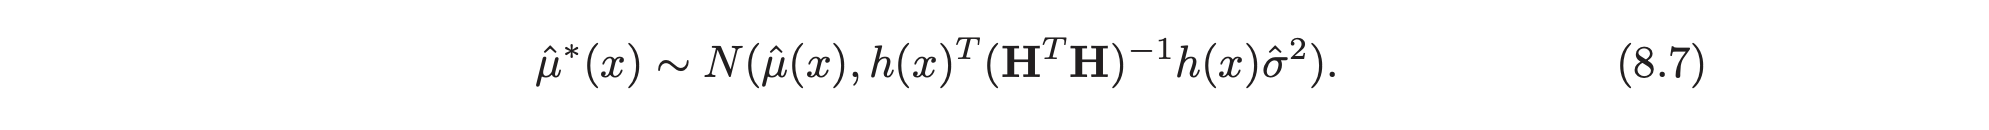

The mean of this distribution is the least squares estimate